Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

Dividing the datasets

There are 2 common options of dividing up datasets
- 80% for training, 20% for testing
- 60% for training, 20% for validation, 20% for testing
    - training set: used for gradient calculation & weight update
    - validation set: used for cross-validation which is performed to assess training quality as training proceeds
        - cross-validation is used to prevent over-fitting which occurs when algorithm focuses on training set details at cost losing generalization ability
    - testing set: used for testing trained network
    
    
The method we are going to use is the training, validation, and testing set up

In [3]:
with open("C:/Users/Tyler/Documents/Python Projects/Traffic Sign Classification Using Deep Learning/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("C:/Users/Tyler/Documents/Python Projects/Traffic Sign Classification Using Deep Learning/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("C:/Users/Tyler/Documents/Python Projects/Traffic Sign Classification Using Deep Learning/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

Perform Image Visualization

11

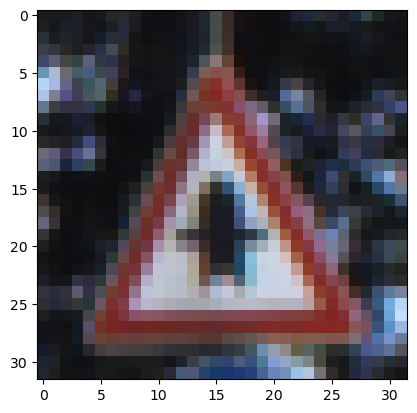

In [7]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

# the axis's are the input from the model, and the picture is the output, where '11' is the label to the appendix on the
# bottom of the notebook, which states ' Right-of-way at the next intersection'

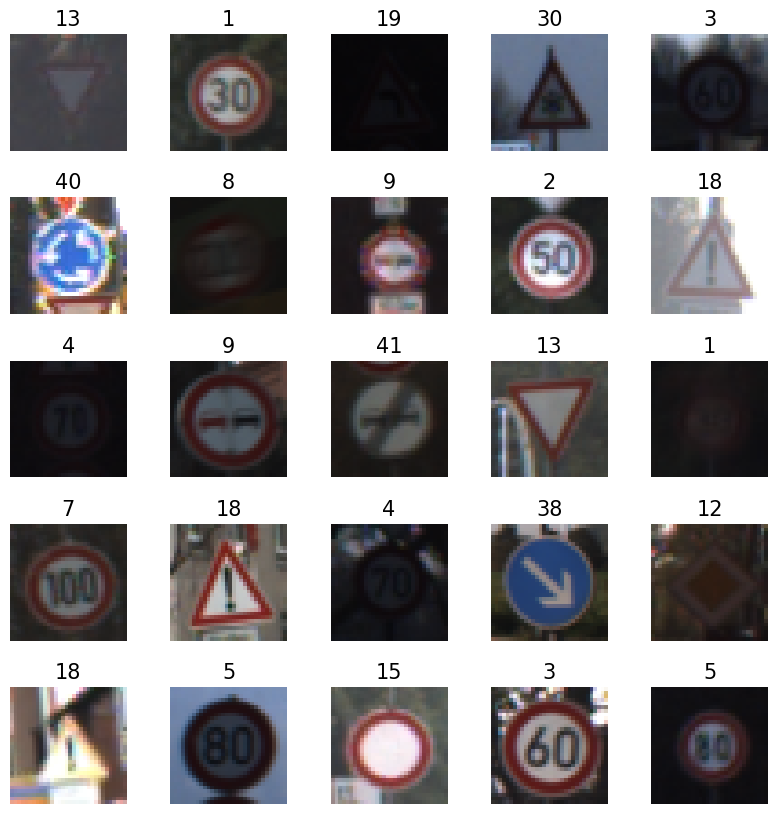

In [8]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid - the below will show us 25 images
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)


Convert Images to Grayscale and Perform Normalization

In [9]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

# we are using shuffle so the network doesn't learn the order of the images

In [14]:
# convert to grayscale

X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [11]:
X_train_gray.shape

# the 1 signifies the images being in grayscale rather than RGB

(34799, 32, 32, 1)

In [15]:
# normalize the images

X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [13]:
X_train_gray_norm

array([[[[-0.34375   ],
         [-0.30989583],
         [-0.3828125 ],
         ...,
         [-0.453125  ],
         [-0.41666667],
         [-0.4296875 ]],

        [[-0.48697917],
         [-0.42708333],
         [-0.30729167],
         ...,
         [-0.25      ],
         [-0.35416667],
         [-0.44010417]],

        [[-0.421875  ],
         [-0.25260417],
         [-0.06770833],
         ...,
         [-0.28385417],
         [-0.29947917],
         [-0.34114583]],

        ...,

        [[-0.43229167],
         [-0.3671875 ],
         [-0.34895833],
         ...,
         [-0.5390625 ],
         [-0.48177083],
         [-0.45052083]],

        [[-0.37760417],
         [-0.359375  ],
         [-0.36458333],
         ...,
         [-0.50520833],
         [-0.484375  ],
         [-0.50260417]],

        [[-0.5234375 ],
         [-0.4609375 ],
         [-0.296875  ],
         ...,
         [-0.4375    ],
         [-0.40625   ],
         [-0.51041667]]],


       [[[ 0.9921875 ],


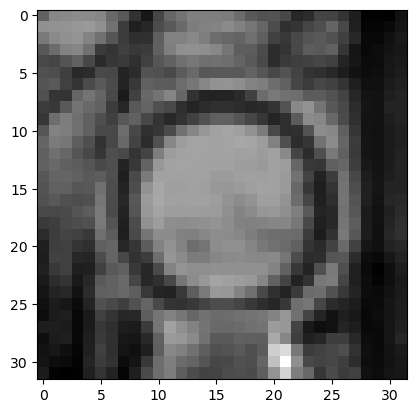

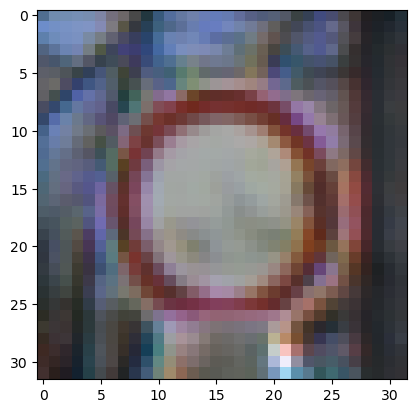

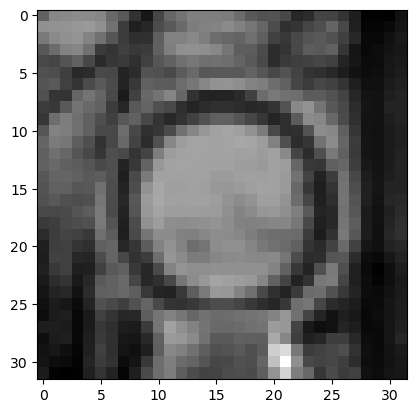

In [16]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# output --> top: grayscale image, middle: color image, bottom: grayscale normalized

Build Deep Convolutional Neural Network Model

In [19]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation = 'relu')) # we only need to define the shape at the beginning
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_2 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)              

Compile and Train the Deep Convolutional Neural Network Model

In [20]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
history = CNN.fit(X_train_gray_norm,
                 y_train,
                 batch_size = 500,  # how many images you will be feeding in at once
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

# Results --> on our initial run, the accuracy of detecting the correctthe model was approximately 15.98%, after a total of 55 rounds of compiling
# and training the data, our CNN Model was at a 98.78% accuracy with detecting the correct traffic sign

Epoch 1/50
70/70 [==============================] - 3s 49ms/step - loss: 0.5856 - accuracy: 0.8327 - val_loss: 0.6672 - val_accuracy: 0.8113
Epoch 2/50
70/70 [==============================] - 8s 114ms/step - loss: 0.5116 - accuracy: 0.8529 - val_loss: 0.6170 - val_accuracy: 0.8256
Epoch 3/50
70/70 [==============================] - 6s 92ms/step - loss: 0.4538 - accuracy: 0.8731 - val_loss: 0.5800 - val_accuracy: 0.8410
Epoch 4/50
70/70 [==============================] - 5s 70ms/step - loss: 0.4061 - accuracy: 0.8847 - val_loss: 0.5467 - val_accuracy: 0.8556
Epoch 5/50
70/70 [==============================] - 5s 74ms/step - loss: 0.3606 - accuracy: 0.9005 - val_loss: 0.5312 - val_accuracy: 0.8528
Epoch 6/50
70/70 [==============================] - 3s 39ms/step - loss: 0.3266 - accuracy: 0.9077 - val_loss: 0.5066 - val_accuracy: 0.8624
Epoch 7/50
70/70 [==============================] - 4s 53ms/step - loss: 0.3023 - accuracy: 0.9157 - val_loss: 0.5154 - val_accuracy: 0.8549
Epoch 8/50
7

Results

On our initial run, the accuracy of detecting the correct traffic sign was approximately 15.98%, after a total of 55 rounds of compiling and training the data, our deep convolutional neural network model was at a 98.78% accuracy.

Assess the Trained CNN Model Performance

In [23]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.7049 - accuracy: 0.8979
Test Accuracy: 0.8978622555732727


Results: on the testing data, data where the CNN has never seen before, it achieved an accuracy of 89.79% of detecting the correct traffic sign

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

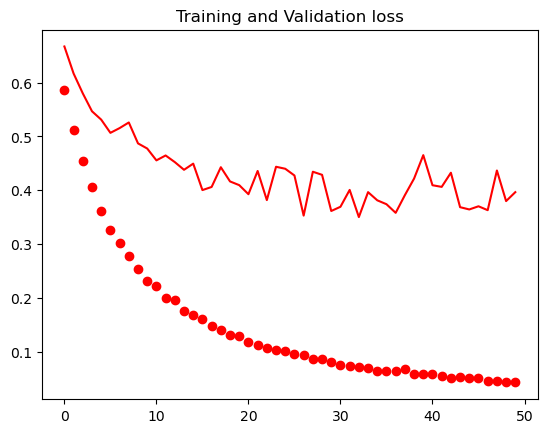

In [27]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

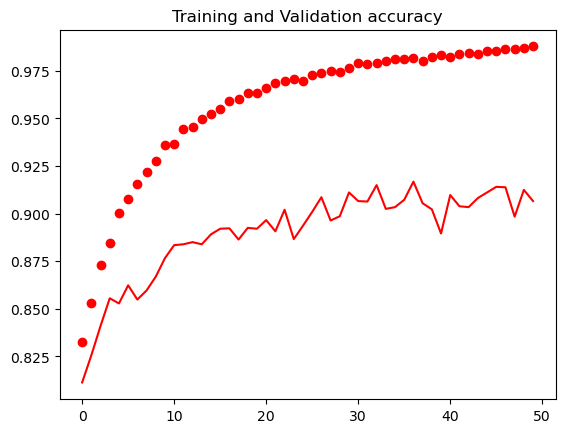

In [28]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

Appendix

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons


- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }